In [135]:
%pip install pandas numpy matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Step 1: Load the Dataset

In [136]:
import pandas as pd
# Function to load data
def load_data(file_path):
    # Load dataset from a CSV file
    df = pd.read_csv(file_path)
    return df
# Load data
df = load_data('C:/Users/hp/Desktop/python scripting for bioinformatics/metabolic_dataset.csv')
# Print first few rows
print(df.head())

    Metabolite Condition  Replicate  Concentration Units
0  Metabolite1   Control          1      80.281301    μM
1  Metabolite1   Control          2      84.658008    μM
2  Metabolite1   Control          3      75.872092    μM
3  Metabolite1   Control          4      75.872174    μM
4  Metabolite1   Control          5      84.938922    μM


# Step 2: Handle Missing Values

# Step 3: Fill missing values with median concentration for each Metabolite and Condition

In [137]:
def handle_missing_values(df):
    """
    first print missing values count then fill them.
    """
    print(f"Missing values before filling: {df['Concentration'].isna().sum()}")
    df['Concentration'] = df.groupby(['Metabolite', 'Condition'])['Concentration'].transform(lambda x: x.fillna(x.median()))
    print("Missing values have been filled with the median of their respective group.")
    print(f"Missing values after filling: {df['Concentration'].isna().sum()}")
    return df
# Function call
df = handle_missing_values(df)

Missing values before filling: 5
Missing values have been filled with the median of their respective group.
Missing values after filling: 0


# Step 4: Standardize Units

In [147]:
# Function to standardize units
def standardize_units(df):
    """
    Standardize units to μM.
    """
    df.loc[df['Units'] == 'mM', 'Concentration'] *= 1000
    df.loc[df['Units'] == 'mM', 'Units'] = 'μM'
    print("Units have been successfully converted to 'μM'.")
    return df
df = standardize_units(df)

Units have been successfully converted to 'μM'.


In [148]:
# Check if all units have been converted to 'μM'
print(df['Units'].unique())

['μM']


# Step 5: Identify and Handle Outliers

In [140]:
def detect_and_replace_outliers(df):
    """Detects and replaces outliers with the group median."""
    Q1 = df.groupby(['Metabolite', 'Condition'])['Concentration'].transform(lambda x: x.quantile(0.25))
    Q3 = df.groupby(['Metabolite', 'Condition'])['Concentration'].transform(lambda x: x.quantile(0.75))
    IQR = Q3 - Q1
    outlier_mask = (df['Concentration'] < (Q1 - 1.5 * IQR)) | (df['Concentration'] > (Q3 + 1.5 * IQR))
    print(f"Outliers found: {outlier_mask.sum()}")
    # Replace outliers
    # Note: It's better to calculate median once
    group_median = df.groupby(['Metabolite', 'Condition'])['Concentration'].transform('median')
    df.loc[outlier_mask, 'Concentration'] = group_median[outlier_mask]
    print("Outliers have been replaced with the median of their group.")
    return df
# Then call the function
df = detect_and_replace_outliers(df)

Outliers found: 17
Outliers have been replaced with the median of their group.


# Step 6: Calculate Summary Statistics

In [141]:
# Function to compute summary statistics
def compute_summary_stats(df):
    # Compute mean, median, and standard deviation for each Metabolite under each Condition
    summary_stats = df.groupby(['Metabolite', 'Condition'])['Concentration'].agg(['mean', 'median', 'std'])
    return summary_stats
# Call the function
compute_summary_stats(df)

mean      median        std
Metabolite   Condition                                   
Metabolite1  Control     80.324499   80.281301   4.464336
             Treatment   74.719990   74.719990   0.004087
Metabolite10 Control     62.371444   62.048568   0.659852
             Treatment   82.186189   82.007579   0.906722
Metabolite2  Control     47.547589   47.547589   0.796456
             Treatment   49.955735   50.356504   6.000106
Metabolite3  Control     20.091708   19.783831   0.691423
             Treatment   43.169796   42.719539   6.465101
Metabolite4  Control     51.799399   52.060923   0.658357
             Treatment   48.801217   48.900887   0.752712
Metabolite5  Control     53.466520   54.182185   3.522192
             Treatment   53.651424   54.218082   3.945831
Metabolite6  Control     23.607715   23.453450   5.674057
             Treatment   27.439738   25.621681   2.663273
Metabolite7  Control    108.053252  150.000000  57.759273
             Treatment   29.384347   29.971337   1.662052
Metabolite8  Control     24.466194   24.186280   3.404304
             Treatment   25.168069   25.104182   3.308173
Metabolite9  Control     46.215224   46.931744   1.144872
             Treatment   43.556830   43.912895   1.185409

# Step 7: Group and Aggregate Data

In [142]:
# Function to calculate mean concentration
def calculate_mean_concentration(df):
    # Calculate mean Concentration for each Metabolite and Condition
    mean_concentration = df.groupby(['Metabolite', 'Condition'])['Concentration'].mean().reset_index()
    return mean_concentration
calculate_mean_concentration(df)

,Metabolite,Condition,Concentration
0,Metabolite1,Control,80.324499
1,Metabolite1,Treatment,74.719990
2,Metabolite10,Control,62.371444
3,Metabolite10,Treatment,82.186189
4,Metabolite2,Control,47.547589
5,Metabolite2,Treatment,49.955735
6,Metabolite3,Control,20.091708
7,Metabolite3,Treatment,43.169796
8,Metabolite4,Control,51.799399
9,Metabolite4,Treatment,48.801217


# Step 8: Visualize the Data

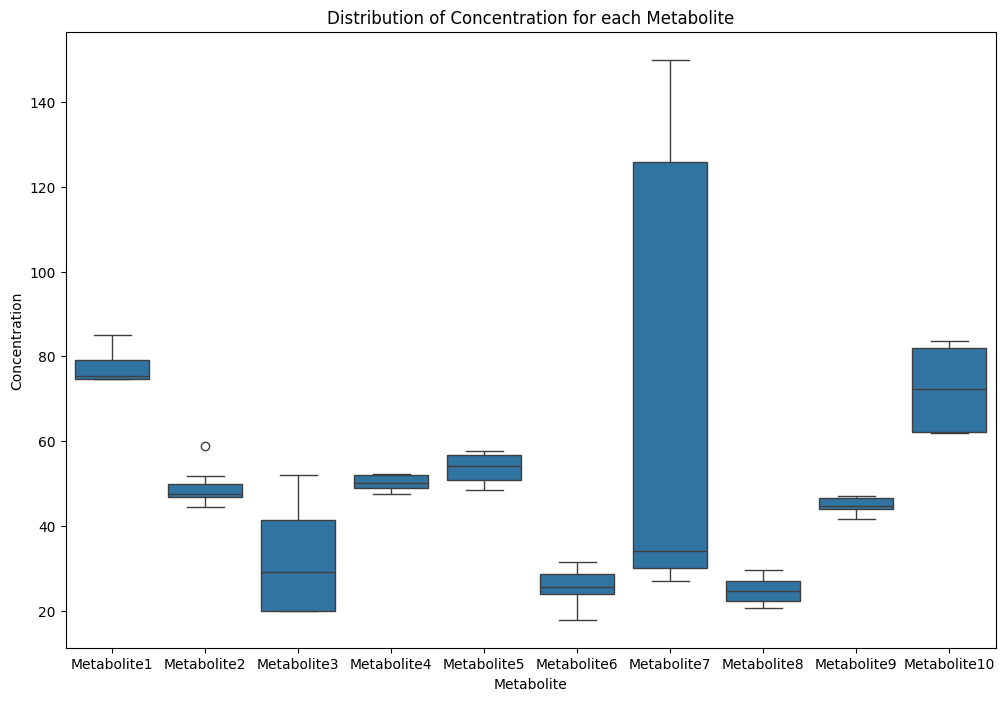

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to plot seaborn boxplot
def plot_seaborn_boxplot(df):
    # Seaborn Boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Metabolite', y='Concentration', data=df)
    plt.title('Distribution of Concentration for each Metabolite')
    plt.show()
# Call the function
plot_seaborn_boxplot(df)

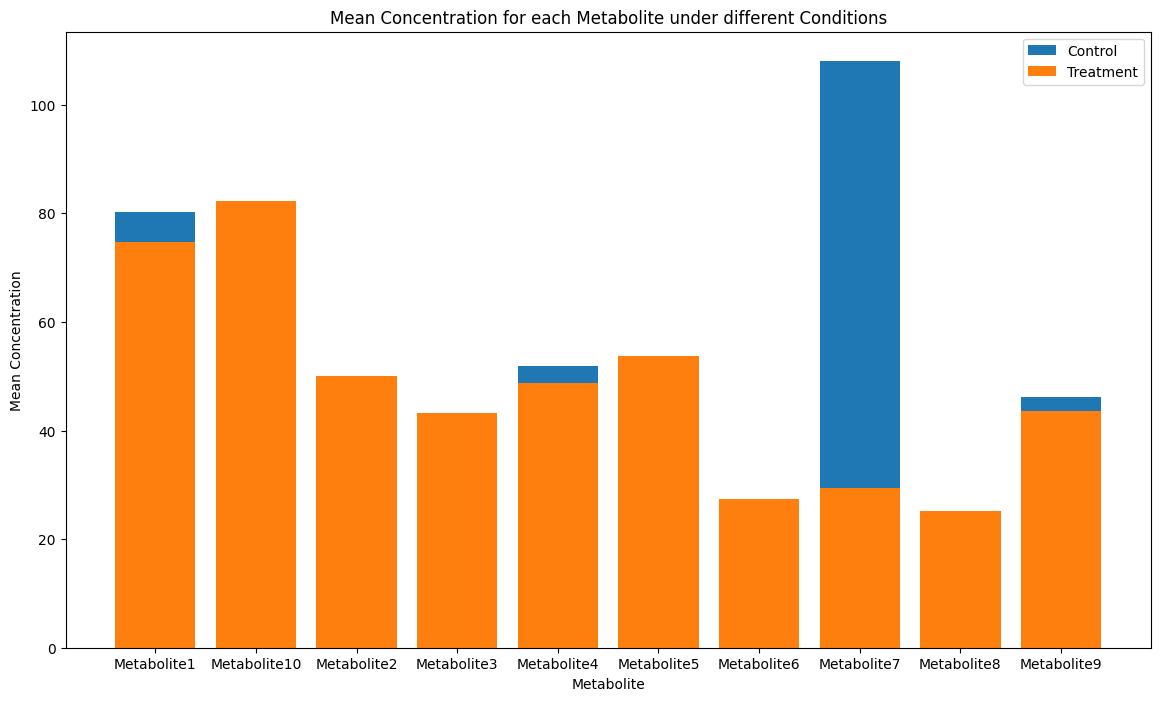

In [149]:
# Function to plot matplotlib bar plot
mean_df = calculate_mean_concentration(df)
def plot_matplotlib_bar_plot(mean_concentration):
    # Matplotlib Bar Plot
    plt.figure(figsize=(14, 8))
    for condition in mean_concentration['Condition'].unique():
        condition_df = mean_concentration[mean_concentration['Condition'] == condition]
        plt.bar(condition_df['Metabolite'], condition_df['Concentration'], label=condition)
    plt.xlabel('Metabolite')
    plt.ylabel('Mean Concentration')
    plt.title('Mean Concentration for each Metabolite under different Conditions')
    plt.legend()
    plt.show()
plot_matplotlib_bar_plot(mean_df)

In [150]:
import plotly.express as px
# Function to plot plotly interactive line plot
def plot_plotly_interactive_line_plot(df):
    # Plotly Interactive Line Plot
    metabolite = df['Metabolite'].unique()[0]  # Select a specific Metabolite
    metabolite_df = df[df['Metabolite'] == metabolite]
    fig = px.line(metabolite_df, x='Replicate', y='Concentration', color='Condition', title=f'Concentration Trends for {metabolite}')
    fig.show()
plot_plotly_interactive_line_plot(df)